In [1]:
library("sentometrics")
library("quanteda")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Package version: 3.2.0
Unicode version: 13.0
ICU version: 69.1
Parallel computing: 24 of 24 threads used.
See https://quanteda.io for tutorials and examples.


# Step 0: Create a corpus

To get started, we need a corpus of documents. In this notebook, we will use a set of news articles from The Wall Street Journal and The Washington Post published between 1995 and 2014.

In [2]:
data("usnews", package="sentometrics")

As we can see, data already contains a tabular structure (more specifically, it is a `data.frame`) and has some columns containing metadata. The columns `wsj` and `wapo` indicate the paper in which the article was pusblished. The columns `economy` and `noneconomy` indicate whether or not the article was related to economy.

In [3]:
head(usnews[, -3])

id,date,wsj,wapo,economy,noneconomy
830981846,1995-01-02,0,1,1,0
842617067,1995-01-05,1,0,0,1
830982165,1995-01-05,0,1,0,1
830982389,1995-01-08,0,1,0,1
842615996,1995-01-09,1,0,0,1
830982368,1995-01-09,0,1,1,0


In [4]:
usnews[["texts"]][2029]

[1] "Dow Jones Newswires NEW YORK -- Mortgage rates rose in the past week after Friday's employment report reinforced the perception that the economy is on solid ground, said Freddie Mac in its weekly survey. The average for 30-year fixed mortgage rates for the week ended yesterday, rose to 5.85 from 5.79 a week earlier and 5.41 a year ago. The average for 15-year fixed-rate mortgages this week was 5.38, up from 5.33 a week ago and the year-ago 4.69. The rate for five-year Treasury-indexed hybrid adjustable-rate mortgages, was 5.22, up from the previous week's average of 5.17. There is no historical information for last year since Freddie Mac began tracking this mortgage rate at the start of 2005."

To make use of the functionalities provided by the `sentometrics` package, we convert the built-in corpus into a `sento_corpus` object.

In [5]:
uscorpus <- sento_corpus(usnews)

In [6]:
class(uscorpus)

[1] "sento_corpus" "corpus"       "character"

In [7]:
typeof(uscorpus)

[1] "character"

# Step 1: Add features to each document

The first step in sentiment analysis is to add extra features to each document. For example, we can check for the presence of certain words or match the words in the articles with a regular expression (regex).

In [8]:
uncertainty_words <- c("uncertainty", "distrust")
election_regex <- "\\bRepublic[s]?\\b|\\bDemocrat[s]?\\b|\\belection\\b"

We can add the features to our `sento_corpus` object with the function `add_features()`. It takes in an `keywords` argument which is a named list that contains the keyword(s) for each feature.

In [9]:
keywords <- list(uncertainty = uncertainty_words, election = election_regex)

In [10]:
keywords

$uncertainty
[1] "uncertainty" "distrust"   

$election
[1] "\\bRepublic[s]?\\b|\\bDemocrat[s]?\\b|\\belection\\b"

In [11]:
uscorpus <- add_features(uscorpus,
                         keywords = keywords,
                         do.binary = TRUE, do.regex = c(FALSE, TRUE))

We can list the variables (which includes the features, but also the date) of each document in out corpus with the method `docvars()`.

In [12]:
docvars(uscorpus)

date,wsj,wapo,economy,noneconomy,uncertainty,election
1995-01-02,0,1,1,0,0,0
1995-01-05,1,0,0,1,0,0
1995-01-05,0,1,0,1,0,0
1995-01-08,0,1,0,1,0,0
1995-01-09,1,0,0,1,0,0
1995-01-09,0,1,1,0,0,0
1995-01-10,1,0,1,0,0,0
1995-01-10,0,1,0,1,0,0
1995-01-11,1,0,0,1,0,0
1995-01-16,1,0,0,1,0,0


## Removing features

If we want to delete the manually created features `uncertainty` and `election`, we set the corresponding columns to `NULL`.

In [13]:
docvars(uscorpus, c("uncertainty", "election")) <- NULL

In [14]:
docvars(uscorpus)

date,wsj,wapo,economy,noneconomy
1995-01-02,0,1,1,0
1995-01-05,1,0,0,1
1995-01-05,0,1,0,1
1995-01-08,0,1,0,1
1995-01-09,1,0,0,1
1995-01-09,0,1,1,0
1995-01-10,1,0,1,0
1995-01-10,0,1,0,1
1995-01-11,1,0,0,1
1995-01-16,1,0,0,1


# Step 2: Sentiment computation

The most important step of sentiment analysis is of course the computation of sentiment. On a high level, `sentometrics` simply computes how often positive and negative words (or word combinations) occur in a document. The value of words is contained in the *lexicon*. `sentometrics` provides three methods to compute sentiment:

1. A **unigrams** approach: The most straightforward method, where computed sentiment is simply a (weighted) sum of all detected word scores as they appear in the lexicon.
2. A **valence-shifting bigrams** approach: The impact of the word appearing before the detected word is evaluated as well. A common example is “not good”, which under the default approach would get a score of 1 (“good”), but now ends up, for example, having a score of −1 due to the presence of the negator “not”. For this method, we need a lexicon and a list of valence shifters (like "not").
3. A **valence-shifting clusters** approach: Valence shifters can also appear in positions other than right before a certain word. We implement this layer of complexity by searching for valence shifters (and other sentiment-bearing words) in a cluster of at maximum four words before and two words after a detected polarized word. For this method, we need a lexicon and a list of valence shifters.

In [15]:
library("lexicon")  # Contains a lot of useful lexicons

## Sentiment computation with unigrams

In [16]:
lex_unigram <- sento_lexicons(list(NRC = hash_sentiment_nrc))

sent_unigram <- compute_sentiment(uscorpus, lex_unigram)

Note that sentiment values are multiplied with the feature values that were already present.

In [17]:
sent_unigram

id,date,word_count,NRC--wsj,NRC--wapo,NRC--economy,NRC--noneconomy
830981846,1995-01-02,213,0.000000000,-0.023474178,-0.02347418,0.000000000
842617067,1995-01-05,110,0.000000000,0.000000000,0.00000000,0.000000000
830982165,1995-01-05,202,0.000000000,-0.009900990,0.00000000,-0.009900990
830982389,1995-01-08,153,0.000000000,0.019607843,0.00000000,0.019607843
842615996,1995-01-09,245,0.024489796,0.000000000,0.00000000,0.024489796
830982368,1995-01-09,212,0.000000000,0.033018868,0.03301887,0.000000000
842614176,1995-01-10,164,0.012195122,0.000000000,0.01219512,0.000000000
830985635,1995-01-10,216,0.000000000,0.041666667,0.00000000,0.041666667
842617154,1995-01-11,97,-0.072164948,0.000000000,0.00000000,-0.072164948
842616780,1995-01-16,283,0.014134276,0.000000000,0.00000000,0.014134276


## Sentiment computation with valence-shifting bigrams

`list_valence_shifters` from the `sentometris` package contains a list of valence shifters in multiple languages. For English, use `list_valence_shifters[["en"]]`. The column `x` contains the words themselves. `y` is the valence shifter to use for valence-shifting bigrams, and `t` is the  valence shifter to use for valence-shifting clusters.

In [18]:
lex_bigram <- sento_lexicons(list(NRC = hash_sentiment_nrc),
                             list_valence_shifters[["en"]][, c("x", "y")])

sent_bigram <- compute_sentiment(uscorpus, lex_bigram)

## Sentiment computation with valence-shifting clusters

Note that we now select columns `"x"` and `"t"` instead of `"x"` and `"y"`.

In [19]:
lex_cluster <- sento_lexicons(list(NRC = hash_sentiment_nrc),
                              list_valence_shifters[["en"]][, c("x", "t")])

sent_cluster <- compute_sentiment(uscorpus, lex_cluster)

## Plot the outputs of the different sentiment calculation approaches

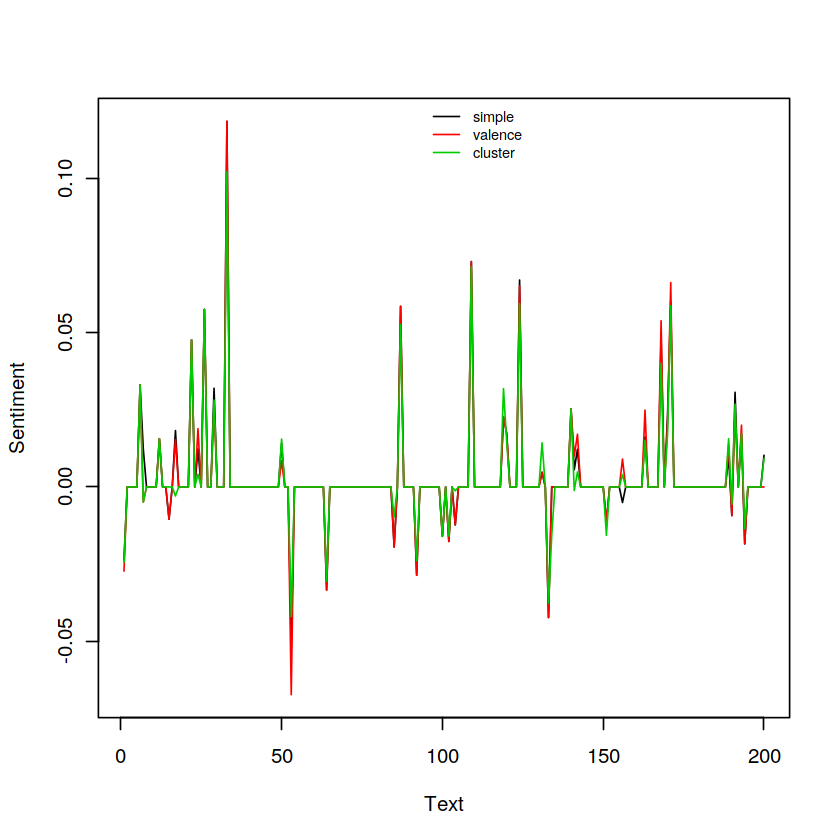

In [20]:
s <- cbind(simple = sent_unigram[["NRC--economy"]][1:200],
           valence = sent_bigram[["NRC--economy"]][1:200],
           cluster = sent_cluster[["NRC--economy"]][1:200])

matplot(s, type = "l", lty = 1, ylab = "Sentiment", xlab = "Text")
legend("topright", col = 1:3, legend = colnames(s), lty = 1, cex = 0.7, bty = "n")

# Step 3: Index aggregation

In this step, we aggregate the individual sentiment scores to obtain various representative time series. Two main aggregations are performed. The first, across-document, collapses all sentiment scores across documents within the same frequency (e.g., day or month, as defined by `by`) into one score. The second, across-time, smooths the newly aggregated sentiment scores over time.

* `howDocs`: This argument defines how sentiment is aggregated across all documents at the same date (or frequency). The option `"proportional"` gives higher weights to documents with more words, relative to the document population at a given date.
* `howTime`: This argument defines how sentiment is aggregated across dates, to smoothen the time series and to acknowledge that sentiment at a given point is at least partly based on sentiment and information from the past. The `"equal_weight"` option is similar to a simple weighted moving average.
* `lag`: how far to go back in time for aggregating across dates.

In [21]:
ctr <- ctr_agg(
    howDocs = "proportional",
    howTime = "equal_weight",
    by = "month",
    lag = 6
)

measures <- aggregate(sent_cluster, ctr)

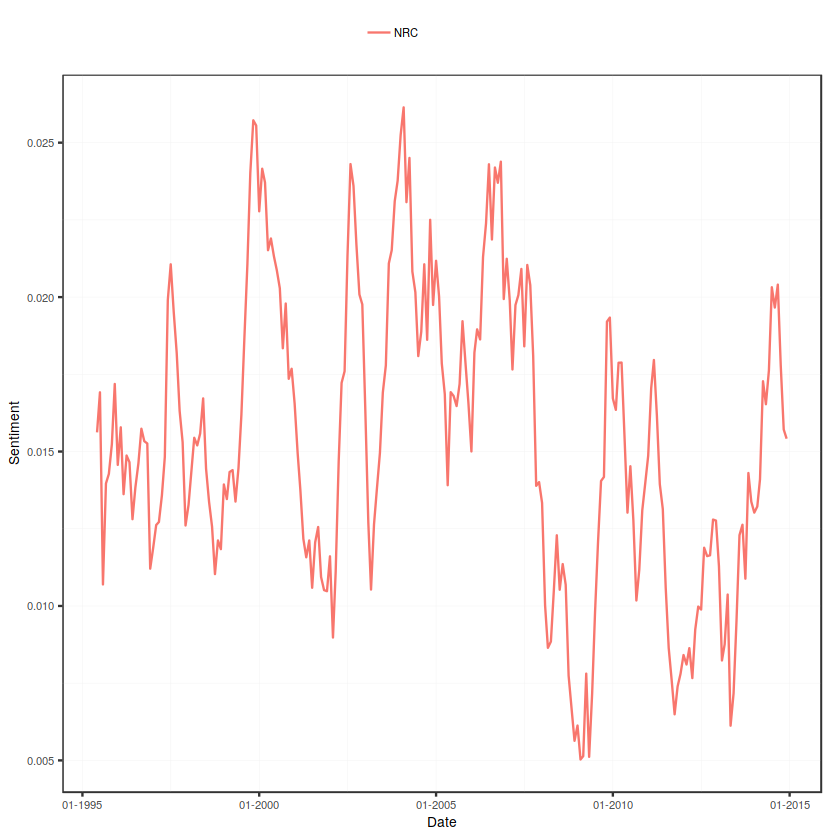

In [22]:
plot(measures, "lexicons")

# Step 4: Modeling

Once we have computed sentiment measures, we can use these as input for a model that can predict some value of interest. When our corpus would consist of movie reviews, for example, we could build a model that predicts the revenue of the movie based on the sentiment measures of the reviews. In the following notebook, we will see an example of predicting the CBOE Volatility Index (VIX) from sentiment measures of the US news papers we have used here.